<a href="https://colab.research.google.com/github/lee-j-j/LJJ/blob/main/OpenCV_018_%EC%96%BC%EA%B5%B4%EA%B2%80%EC%B6%9C(Harr%2C_Cvlib).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://arome1004.cafe24.com/images/opencv/lecture_image/00_title.png"></center>

In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/사물지능A

/content/drive/MyDrive/Colab Notebooks/사물지능A


<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:40px; text-align: center;"><font size=4 color=blue><b>[18차시] 학습목표</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>

○ Harr cascade classifier 알고리즘에 대해 이해한다
        
○ Harr cascade classifier 알고리즘을 이용하여 얼굴 및 눈을 검출한다 (이미지, 동영상)
        
○ cvlib 라이브러리를 이용하여 얼굴을 검출한다     
        
○ cvlib 라이브러리를 이용하여 성별을 판별한다           
        
</font></td></tr>   
</table>

# 얼굴 검출

- 참고
  - https://learnopencv.com/face-recognition-an-introduction-for-beginners/
  - https://learnopencv.com/what-is-face-detection-the-ultimate-guide/?ck_subscriber_id=1842458982      
  - https://learnopencv.com/face-recognition-with-arcface/

## 얼굴 검출 개요

- 이미지나 영상에서 인간의 얼굴의 존재를 감지하고 위치를 찾는 작업
- 얼굴검출은 얼굴의 랜드마크 감지, 성별 분류, 얼굴 추적, 얼굴 인식 등의 작업의 시작점이라 할 수 있음
- 얼굴검출의 응용 분야 : 보안, 마케팅, 의료, 엔터테인먼트, 법 집행, 감시, 사진, 게임, 화상회의 등

<table width=600><tr><td><center><img src="https://arome1004.cafe24.com/images/opencv/lecture_image/18_face_detect.jpg" width="100%"></center><br><center>얼굴검출</center></td><td><center><img src="https://arome1004.cafe24.com/images/opencv/lecture_image/18_face_recognition.jpg" width="100%"></center><br><center>얼굴인식</center></td></tr></table>


## 얼굴검출의 어려운 경우
- 일부분만 보이는 경우
- 조명 : 조명이 얼굴의 부위마다 다른 경우
- 피부색이 다른 경우
- 얼굴의 방향이 다른 경우
- 얼굴의 표정이 다른 경우
- Accessories, 화장, 문신, 수염, 마스크 등이 있는 경우
- 얼굴의 크기가 다른 경우
  
<center><img src="https://arome1004.cafe24.com/images/opencv/lecture_image/18_face_detect2.png" width="60%"> </center>


## 얼굴 검출을 위한 벤치마킹 데이터세트

- FDDB (얼굴 감지 데이터 세트 및 벤치 마크) (2010년)
    - 5,171개의 얼굴이 있는 2,845개의 이미지로 구성
    - http://vis-www.cs.umass.edu/fddb/
- AFW (Annotated Faces in the Wild) Dataset (2012년)
    - 468개의 얼굴이 있는 205개의 이미지로 구성
    - http://vis-www.cs.umass.edu/fddb/
- Pascal Face (2013년)
    - http://host.robots.ox.ac.uk/pascal/VOC/databases.html
    - 1,341개의 얼굴이 있는 851개의 이미지로 구성
- MALF (Multi-Attribute Labelled Faces) (2015년)
    - 12,000개의 얼굴이 있는 5,250개의 이미지로 구성
    - http://www.cbsr.ia.ac.cn/faceevaluation/
- WiderFace (2015년)
    - 393,703개의 얼굴이 있는 32,203개의 이미지로 구성
    - http://shuoyang1213.me/WIDERFACE/
- UFDD (Unconstrained Face Detection Dataset) (2018년)
    - 10,895개의 얼굴이 있는 6,424개의 이미지로 구성
    - https://ufdd.info/
    
## 얼굴 감지 성능 평가 도구
  - IoU (I(=교집합)/U(=합집합)), Precision, Recall, PR 곡선, ROC 곡선, AP, MAP 등
  
## 얼굴 감지 알고리즘 및 데이터 세트의 변천사  

<center><img src="https://arome1004.cafe24.com/images/opencv/lecture_image/18_face_detect3.jpg" width="80%">  </center>

# 얼굴과 눈 검출 (Harr cascade classifier 활용)

## harrcascade 알고리즘 개요

- 참고 : https://notou10.github.io/opencv/2020/08/28/opencv_Harr_cascade.html


- Alfred Haar에 의해 1909년 제안
- 물체 특징 기반 검출 알고리즘인 Haar cascade를 이용한 얼굴 검출
  

- 알고리즘 동작 순서
  - Haar Feature Selection
  - Creating  Integral Images
  - Adaboost Training
  - Cascading Classifiers
  

### Haar Feature 선택

- Haar Feature : 크기와 모양이 동일한 사각형들로 구성 (흰색 영역의 합 - 검은색 영역의 합으로 계산)

  <center><img src="https://arome1004.cafe24.com/images/opencv/lecture_image/18_harr01.png" width="60%"></center>


### Integral Images 생성


- 적분 이미지(integral image) : 큰 이미지라도 빠르게 지정한 영역의 픽셀의 합을 계산
  - 기존 이미지의 너비와 높이에 1씩 더해서 더 큰 이미지를 만든 후 맨 왼쪽과 맨 위쪽은 0으로 채움
  - 이미지 픽셀값들을 왼쪽에서 오른쪽, 위쪽에서 아래쪽 방향으로 누적합을 계산

  <center><img src="https://arome1004.cafe24.com/images/opencv/lecture_image/18_harr05.png" width="60%"></center>
  <center><img src="https://arome1004.cafe24.com/images/opencv/lecture_image/18_harr03.png" width="40%"></center>
  
  
- 왼쪽에서 보이는 기존 이미지에서 영역을 지정하여 내부의 값을 구할때 적분 이미지에서 대응하는 영역의 오른쪽아래 픽셀의 값에서 위쪽 픽셀과 아래쪽 픽셀값을 빼주고 대각선 방향에 있는 픽셀을 더해줌   

  <center><img src="https://arome1004.cafe24.com/images/opencv/lecture_image/18_harr04.png" width="40%"></center>


### Adaboost Training

- AdaBoost(Adaptive Boost) Algorithm
  - Classifier의 성능을 점진적으로 학습시키기 위한 (weak)classifier가 학습하는 과정에서, 틀린 data에 대해 가중치를 더 부여하여 다음 classify하는 과정에 영향을 미치게 하는 알고리즘
  
  
  - 그림의 상단 3개 박스를 좌측부터 보면, 처음 classifier인 선은 + 3개가 틀림 (첫 번째 박스)
  - 다음 과정에서 틀렸던 3 개는 가중치를 부여받고, 또 classify하면 이 때에 는 - 3개가 틀림 (두 번째 박스)
  - 마지막 학습 과정에서 역시 틀렸던 - 가 가중치를 받음.
  - 즉, 학습 과정에서 연속적으로 틀리는 +들은 더 가중치를 받고, 반면 연속적으로 맞추는 +들은 가중치가 더욱 작아지는 방식
  - 마지막으로 위 세 가지 생성한 트리들을 합치면, 하단의 박스인 classifier를 얻을 수 있음
  
  <center><img src="https://arome1004.cafe24.com/images/opencv/lecture_image/18_adaboost.png" width="40%">   </center>



- 이미지에서 16만개 이상 존재하는 하르 특징 중 얼굴 검출에 의미 있는 특징을 골라내는 데 Adaboost를 사용

- 배경 : 1-a feature을 씌워보면 feature 박스 안에 해당하는 값이 모두 124 정도의 값을 가질 것
- 눈썹 부분 : 1-a feature를 씌워보면 눈썹 위 피부에 해당하는 명도 값은 상대적으로 밝은 50 정도의 값을 띌 것이고, 눈썹은 상대적으로 어두운 200정도의 값을 띌 것 → 눈썹 검출
- 코 부분 : 코가 오똑 솟은 부분은 밝은 값, 팔자 주름이 있는 부분은 상대적으로 어두운 값은 가지므로 line feature을 대입해 보면 코로 검출
  
  <center><img src="https://arome1004.cafe24.com/images/opencv/lecture_image/18_harr02.png" width="30%">  </center>


- 처리 과정
  - 초기에는 모든 하르 특징이 똑같은 가중치가 할당
  - 모든 하르 특징에 대해 학습 데이터 세트를 사용하여 분류한 결과 각 하르 특징의 에러률을 계산하고 잘못 분류하는 하르 특징에는 가중치를 증가 → 성능 좋은 하르 특징은 낮은 에러률 가짐
  - 낮은 에러률을 보이는 하르 특징을 선택
  - 요구하는 정확성 또는 요구하는 에러율 획득 또는 요구하는 개수의 특징을 발견할 때까지 반복
  - Adaboost를 통해 16만개의 특징은 6000개의 특징으로 감소


### Cascading Classifiers

- 이미지에 24 x 24 크기의 윈도우에 6000개의 하르 특징을 적용하여 얼굴을 검출 → 계산량이 너무 많기 때문에 비효율적
- Cascade Classifier : 윈도우가 이미지 위를 이동할 때마다 6000개의 특징을 모두 적용하지 않고 여러 단계의 그룹으로 묶어 사용 것
  - 첫번째 단계의 특징에서 얼굴 영역이 아니라는 판정이 나면 바로 다음 위치로 윈도우를 이동
  - 첫번째 단계의 특징에서 얼굴 영역이라는 판정이 내려지면 현재 윈도우가 위치한 곳에 다음 단계의 특징을 적용


  - 알고리즘 다운로드 : https://github.com/opencv/opencv/tree/master/data/haarcascades

###  이미지에서 얼굴과 눈 추적하기

In [9]:
#실습
import cv2

# 얼굴 영역 인식 모델
face_cascade = cv2.CascadeClassifier("./images/haar/haarcascade_frontalface_default.xml")
# 눈 영역 인식 모델
eye_cascade = cv2.CascadeClassifier("./images/haar/haarcascade_eye.xml")
# 웃는 표정 인식 모델
smile_cascade = cv2.CascadeClassifier("./images/haar/haarcascade_smile.xml")

[[104  67  92  92]
 [430 120  66  66]
 [509 112  86  86]
 [244  89  92  92]
 [309 203  75  75]]


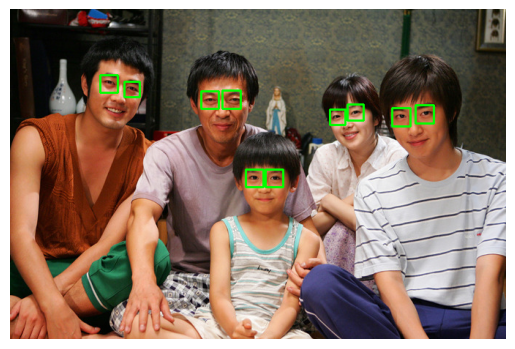

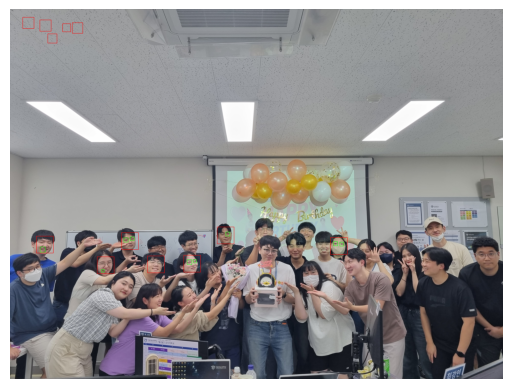

In [34]:
#실습
import matplotlib.pyplot as plt

img = cv2.imread("./images/face.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

img_j = cv2.imread("./images/ljj.jpg")
img_j = cv2.cvtColor(img_j, cv2.COLOR_BGR2RGB)
img_j_gray = cv2.cvtColor(img_j,cv2.COLOR_RGB2GRAY)

# scaleFactor : 검색 영역을 검색할 때, 기본 크기에서 얼마만큼까지 확대해서 검색할 것인지
              # 작을수록 정확도는 올라가고 속도는 점점 느려짐
# minNeighbors : 검색된 영역들의 최소거리를 설정 (중복영역 영역을 제거)
              # 클수록 덜 감지되지만 정확도는 올라감
# faces는 (x, y, w, h)가 반환 : 좌상단좌표, 너비, 높이

faces = face_cascade.detectMultiScale(img_gray, scaleFactor=1.4, minNeighbors=5)
faces_j = face_cascade.detectMultiScale(img_j_gray, scaleFactor=2.4, minNeighbors=5)
eyes = eye_cascade.detectMultiScale(img_gray, scaleFactor=1.8, minNeighbors=5)
eyes_j = eye_cascade.detectMultiScale(img_gray, scaleFactor=2.4, minNeighbors=5)
# smiles = smile_cascade.detectMultiScale(img_gray, scaleFactor=1.4, minNeighbors=5)

print (faces)
# print (eyes)
# print (smiles)

for (x, y, w, h) in faces :
  cv2.rectangle(img_j, (x,y), (x+w, y+h), (255, 0, 0), 2)

# 눈 영역 검출 : 얼굴 영역 내부
# 얼굴 영역만 잘라냄
  roi_gray = img_gray[y:y+h, x:x+w]
  roi_color = img[y:y+h, x:x+w]

  eyes = eye_cascade.detectMultiScale(roi_gray, 1.05, 3)

  for (ex, ey, ew, eh) in eyes :
    cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh), (0, 255, 0), 2)

plt.imshow(img)
plt.axis("off")
plt.show()


for (x, y, w, h) in faces_j :
  cv2.rectangle(img_j, (x,y), (x+w, y+h), (255, 0, 0), 2)
  roi_gray_j = img_j_gray[y:y+h, x:x+w]
  roi_color_j = img_j[y:y+h, x:x+w]

  eyes_j = eye_cascade.detectMultiScale(roi_gray_j, 1.05, 3)

  for (ex, ey, ew, eh) in eyes_j :
    cv2.rectangle(roi_color_j, (ex,ey), (ex+ew, ey+eh), (0, 255, 0), 2)

plt.imshow(img_j)
plt.axis("off")
plt.show()

### 동영상에서 얼굴과 눈 추적하기

In [20]:
#실습
!pip install cvlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 73.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for cvlib: filename=cvlib-0.2.7-py3-none-any.whl size=10046367 sha256=90be8874b05c4f49a6aa230b9907c4e8e29adc31ebf232dbc36717630edd4863
  Stored in directory: /root/.cache/pip/wheels/9e/a5/d4/fe37b48fe4f4b621ba5e574a991230070f3cc4f02322a01489
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12067 sha256=afc2adfb8d3e309e7ce226eb9b7564dea7ba56aeae8e57f445e5ced418e43640
  Stored in directory: /root/.cache/pip/wheels/cd/17/e5/765d1a3112ff3978f70223502f6047e06c43a24d7c5f8ff95b
Successfully built cvlib progressbar


## 얼굴검출 (cvlib 라이브러리 활용)

- cvlib 라이브러리 : 파이썬에서 얼굴, 객체 인식을 위한 사용하기 쉬운 라이브러리

- https://www.cvlib.net/
- https://github.com/arunponnusamy/cvlib
- cvlib 라이브러리는 COCO dataset (https://cocodataset.org/) 에서 훈련된 YOLO 모델을 제공

- 80 종류의 물체를 검출

In [ ]:
!pip install cvlib

In [ ]:
!pip install tensorflow

[277, 96, 321, 155]
[379, 145, 417, 191]
[160, 121, 196, 166]
[441, 109, 487, 164]
[531, 108, 569, 158]
[82, 86, 119, 140]


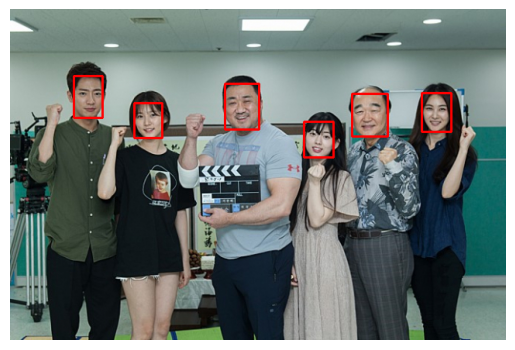

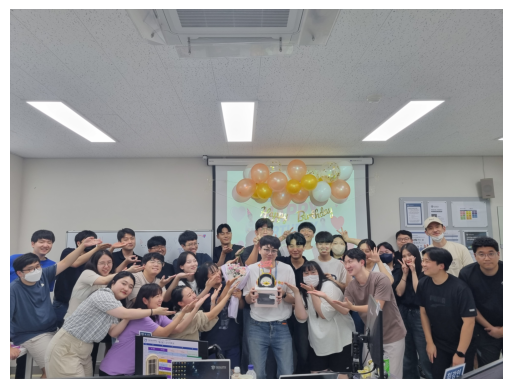

In [38]:
#실습
import cvlib as cv
from cvlib.object_detection import draw_bbox
import matplotlib.pyplot as plt

img2 = cv2.imread("./images/face3.jpg")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# 얼굴 검출
# faces (x1, y1, x2, y2) - 좌상단, 우하단 좌표
faces, score = cv.detect_face(img2)

for face in faces :
  cv2.rectangle(img2, (face[0], face[1]),(face[2], face[3]), (255,0,0), 2)
  print(face)

plt.imshow(img2)
plt.axis("off")
plt.show()


img_jj = cv2.imread("./images/ljj.jpg")
img_jj = cv2.cvtColor(img_jj, cv2.COLOR_BGR2RGB)

faces, score = cv.detect_face(img_jj)

for face in faces :
  cv2.rectangle(img_jj, (face[0], face[1]),(face[2], face[3]), (255,0,0), 2)
  print(face)

plt.imshow(img_jj)
plt.axis("off")
plt.show()

## 객체인식

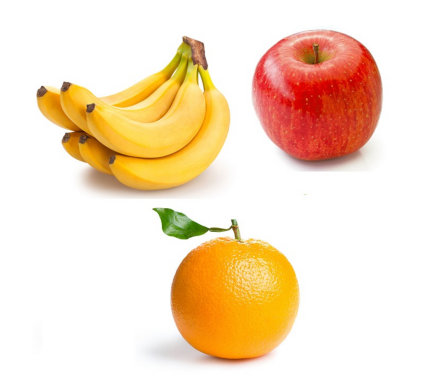

In [36]:
#실습
img3 = cv2.imread("./images/fruit.jpg")
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

# Yolo4 를 이용한 객체 인식
# 반환값 : 사각형 박스 영역, 추출된 라벨값, 정확도
bbox, label, conf = cv.detect_common_objects(img3, confidence=0.7, model="yolov4-tiny")

# bbox를 이용해서 영역 표시
out = draw_bbox(img3, bbox, label, conf)


plt.imshow(img3)
plt.axis("off")
plt.show()


<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:40px; text-align: center;"><font size=4 color=blue><b>[18차시] 정리하기</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>

○ harrcascade 알고리즘 동작 순서
  - Haar Feature Selection : 크기와 모양이 동일한 사각형들로 구성 (흰색 영역의 합 - 검은색 영역의 합으로 계산)

  - Creating Integral Images : 큰 이미지라도 빠르게 지정한 영역의 픽셀의 합을 계산

  - Adaboost Training : Classifier의 성능을 점진적으로 학습시키기 위한 (weak)classifier가 학습하는 과정에서, 틀린 data에 대해 가중치를 더 부여하여 다음 classify하는 과정에 영향을 미치게 하는 알고리즘
  
  - Cascading Classifiers : 윈도우가 이미지 위를 이동할 때마다 6000개의 특징을 모두 적용하지 않고 여러 단계의 그룹으로 묶어 사용 것           
</font></td></tr>   
</table>